In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from geofunctions import utils
import matplotlib.pyplot as plt

import os

In [39]:
import importlib

importlib.reload(utils)

<module 'geofunctions.utils' from '/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/geofunctions/utils.py'>

In [2]:
def calculate_share_statarea(work_df):
    work_statarea = work_df[["geohash_home", "share_home_work_hours","share_work_in_home_hours", "share_days_work_location", 'hour_work_all','hour_home_all']].merge(
        geohash_stat_area[["geohash", "YISHUV_STAT_2022"]],
        left_on="geohash_home",
        right_on="geohash",
    )
    work_statarea_agg = work_statarea.groupby(["YISHUV_STAT_2022"])[[
         "share_home_work_hours","share_work_in_home_hours","share_days_work_location", 'hour_work_all','hour_home_all'
    ]].agg("mean")
    work_statarea_agg =  work_statarea_agg.join(work_statarea.groupby(["YISHUV_STAT_2022"])[
         "share_home_work_hours"].count().rename("count_users").to_frame())
    # work_statarea_agg.columns = ["mean_share_home_in_work_hours", "count_users"]
    return work_statarea_agg.reset_index()
    

# Remote work by stat area

In [4]:
geohash_stat_area = gpd.read_file(
    utils.get_path("processed", "adm", "geohash_stat_area_pairs.geojson")
)

In [3]:
months_files = os.listdir(utils.get_path("processed", "dwells", "work"))
months_files = [f for f in months_files if f.endswith(".csv")]

In [6]:
work_list=[]

In [7]:
for monthly_file in sorted(months_files):

    MONTH = monthly_file.split("_")[-1][:-4]
    print(MONTH)

    work_df_part = pd.read_csv(
        os.path.join(
            utils.get_path("processed", "dwells", "work"),
            f"users_work_home_{MONTH}.csv",
        ),
        index_col=0,
    )
    work_df_month = calculate_share_statarea(work_df_part)
    work_df_month["month"] = MONTH
    work_list.append(work_df_month)

201901
201904
201907
201908
201909
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202301
202302
202303
202304
202305
202306
202309


In [8]:
work_stat_area_all = pd.concat(work_list)

In [86]:
work_stat_area_all.head()

,YISHUV_STAT_2022,share_home_work_hours,share_work_in_home_hours,share_days_work_location,hour_work_all,hour_home_all,count_users,month
0,5516,0.226482,0.158767,0.385210,52.915254,65.627119,59,202001
1,5518,0.439207,0.223082,0.312443,33.000000,68.246377,69,202001
2,5519,0.334330,0.231362,0.348951,40.125000,52.291667,22,202001
3,5520,0.374957,0.210457,0.309696,59.043478,95.282609,46,202001
4,5525,0.433524,0.252601,0.315065,45.000000,70.344828,29,202001


## Calculating statistics

In [87]:
work_stat_area_all.groupby('month').size()

month
202001    1283
202002    1051
202003    1094
202004     607
202005    1134
202006    1203
202007    1235
202008    1235
202009    1262
202010    1188
202011    1251
202101    1199
202102    1158
202103    1199
202104    1206
202105    1091
202106    1100
202107    1118
202108     909
202109     969
202110     875
202111     878
202112    1203
202201    1147
202202    1221
202203    1201
202204    1153
202205    1229
202206    1218
202207    1207
202208    1223
202209    1212
202210    1184
202211    1201
202301    1201
202302    1205
202303    1206
202304    1169
202305    1214
202306    1218
202309    1168
dtype: int64

In [9]:
month_corr_2approach = work_stat_area_all.groupby('month')[['share_home_work_hours','share_work_in_home_hours']].corr().iloc[0::2, 1].reset_index(level=1, drop=True).rename("corr")

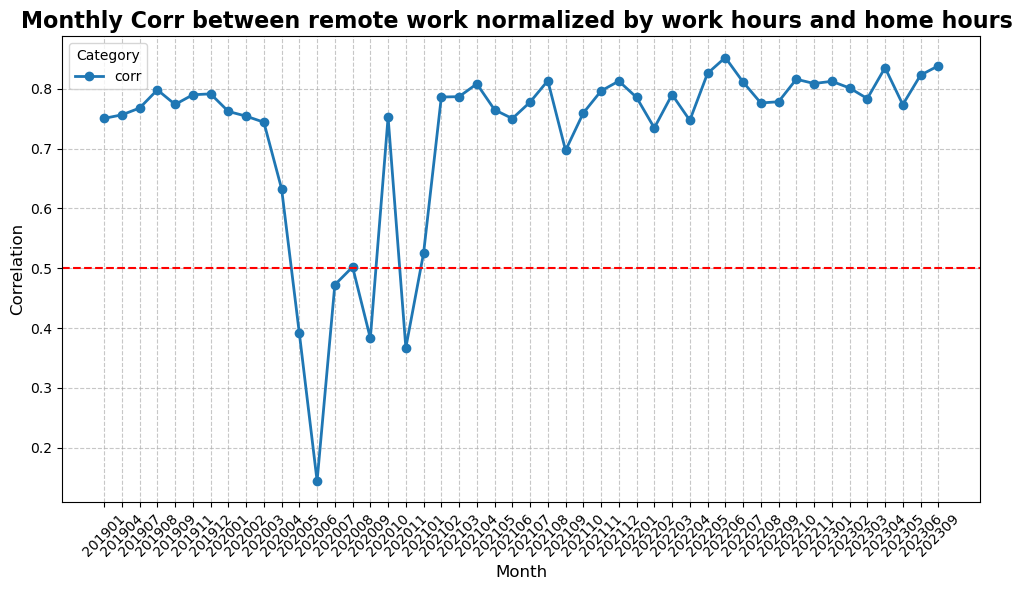

In [10]:

# Grouping and plotting
ax = month_corr_2approach.plot(
    figsize=(10, 6),  # Adjust the figure size
    marker='o',       # Add markers to the lines
    linestyle='-',    # Set line style
    linewidth=2       # Set line width
)

# Customize the plot
ax.set_title('Monthly Corr between remote work normalized by work hours and home hours ', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Correlation', fontsize=12)
ax.legend(title='Category', fontsize=10)
ax.grid(visible=True, linestyle='--', alpha=0.7)  # Add a grid

# Add a red dashed horizontal line at y=5000
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, label='Threshold: 5000')

# Make the x-axis labels more readable if 'month' is not numerical
months = sorted(month_corr_2approach.index.tolist())  # Extract unique months  # Spread ticks evenly
ax.set_xticks(range(len(months))) 
ax.set_xticklabels(months, rotation=45, fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

Output: during covid corr is low, which means we cannot normalize by home in this period. But in the remaining time it is ok, so we can use normalization on home hours

In [11]:
work_stat_area_all.month.unique()

array(['201901', '201904', '201907', '201908', '201909', '201911',
       '201912', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202101', '202102', '202103', '202104', '202105', '202106',
       '202107', '202108', '202109', '202110', '202111', '202112',
       '202201', '202202', '202203', '202204', '202205', '202206',
       '202207', '202208', '202209', '202210', '202211', '202301',
       '202302', '202303', '202304', '202305', '202306', '202309'],
      dtype=object)

In [13]:
months_ok = work_stat_area_all.month.unique()

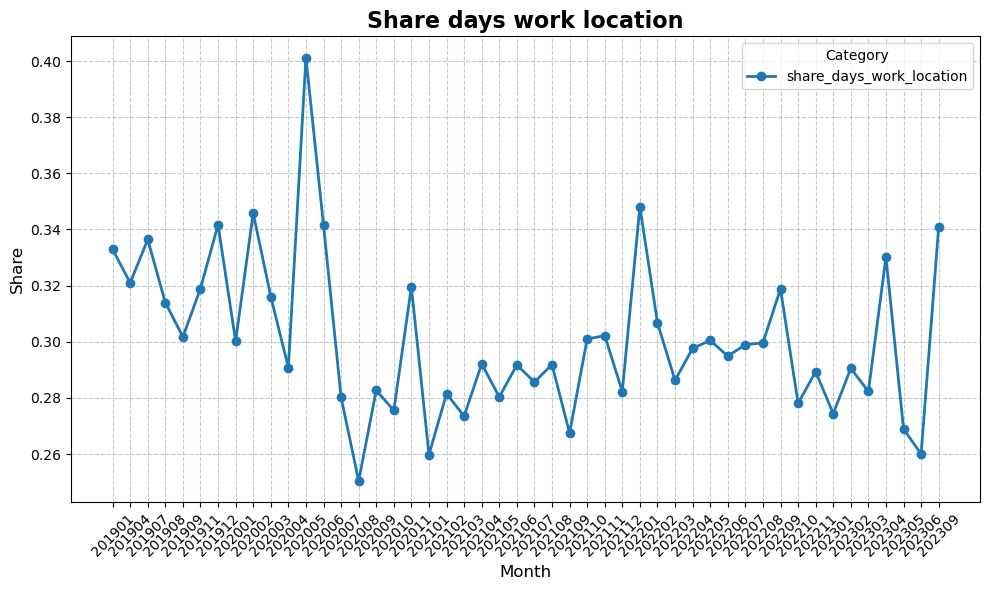

In [14]:
# Grouping and plotting
ax = work_stat_area_all[(work_stat_area_all.month.isin(months_ok ))&(work_stat_area_all.count_users>=3)].groupby('month')['share_days_work_location'].mean().plot(
    figsize=(10, 6),  # Adjust the figure size
    marker='o',       # Add markers to the lines
    linestyle='-',    # Set line style
    linewidth=2       # Set line width
)

# Customize the plot
ax.set_title('Share days work location', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Share', fontsize=12)
ax.legend(title='Category', fontsize=10)
ax.grid(visible=True, linestyle='--', alpha=0.7)  # Add a grid

# Make the x-axis labels more readable if 'month' is not numerical
months = sorted(months_ok )  # Extract unique months  # Spread ticks evenly
ax.set_xticks(range(len(months))) 
ax.set_xticklabels(months, rotation=45, fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

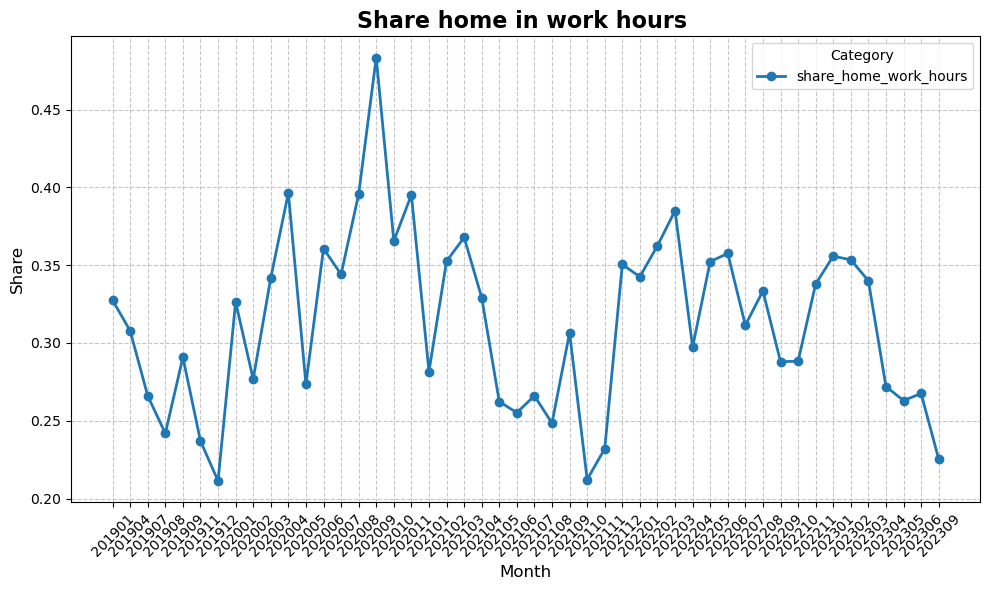

In [15]:
# Grouping and plotting
ax = work_stat_area_all[(work_stat_area_all.month.isin(months_ok ))&(work_stat_area_all.count_users>=3)].groupby('month')['share_home_work_hours'].mean().plot(
    figsize=(10, 6),  # Adjust the figure size
    marker='o',       # Add markers to the lines
    linestyle='-',    # Set line style
    linewidth=2       # Set line width
)

# Customize the plot
ax.set_title('Share home in work hours ', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Share', fontsize=12)
ax.legend(title='Category', fontsize=10)
ax.grid(visible=True, linestyle='--', alpha=0.7)  # Add a grid

# Make the x-axis labels more readable if 'month' is not numerical
months = sorted(months_ok )  # Extract unique months  # Spread ticks evenly
ax.set_xticks(range(len(months))) 
ax.set_xticklabels(months, rotation=45, fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [20]:
work_stat_area_all["share_work_home_month"] = work_stat_area_all["hour_work_all"]/work_stat_area_all["hour_home_all"]

In [17]:
work_stat_area_all["total_work_home_month"] = work_stat_area_all["hour_work_all"]+work_stat_area_all["hour_home_all"]

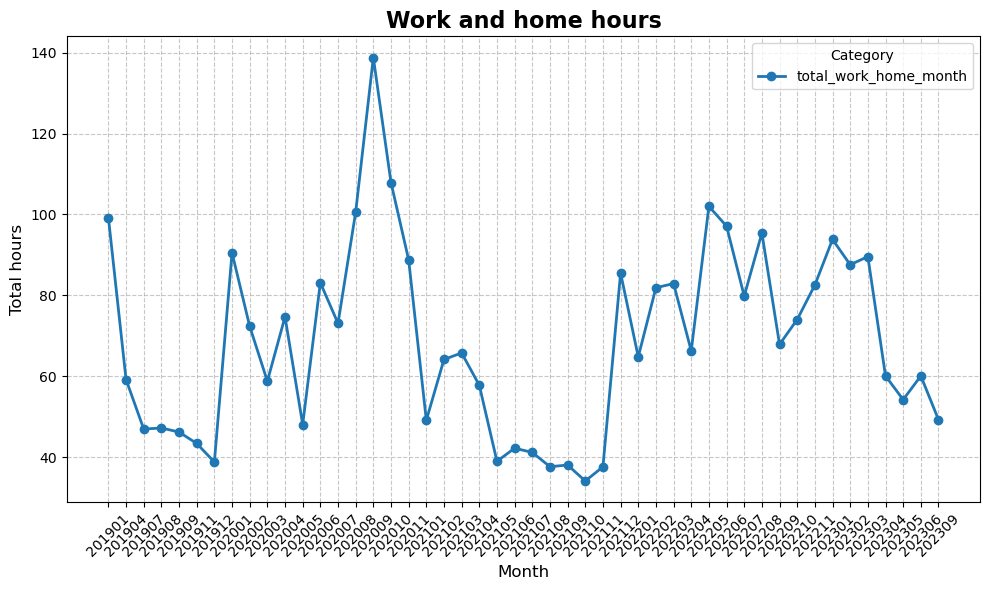

In [18]:
# Grouping and plotting
ax = work_stat_area_all[(work_stat_area_all.month.isin(months_ok ))&(work_stat_area_all.count_users>=5)].groupby('month')["total_work_home_month"].mean().plot(
    figsize=(10, 6),  # Adjust the figure size
    marker='o',       # Add markers to the lines
    linestyle='-',    # Set line style
    linewidth=2       # Set line width
)

# Customize the plot
ax.set_title('Work and home hours', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total hours', fontsize=12)
ax.legend(title='Category', fontsize=10)
ax.grid(visible=True, linestyle='--', alpha=0.7)  # Add a grid

# Make the x-axis labels more readable if 'month' is not numerical
months = sorted(months_ok )  # Extract unique months  # Spread ticks evenly
ax.set_xticks(range(len(months))) 
ax.set_xticklabels(months, rotation=45, fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

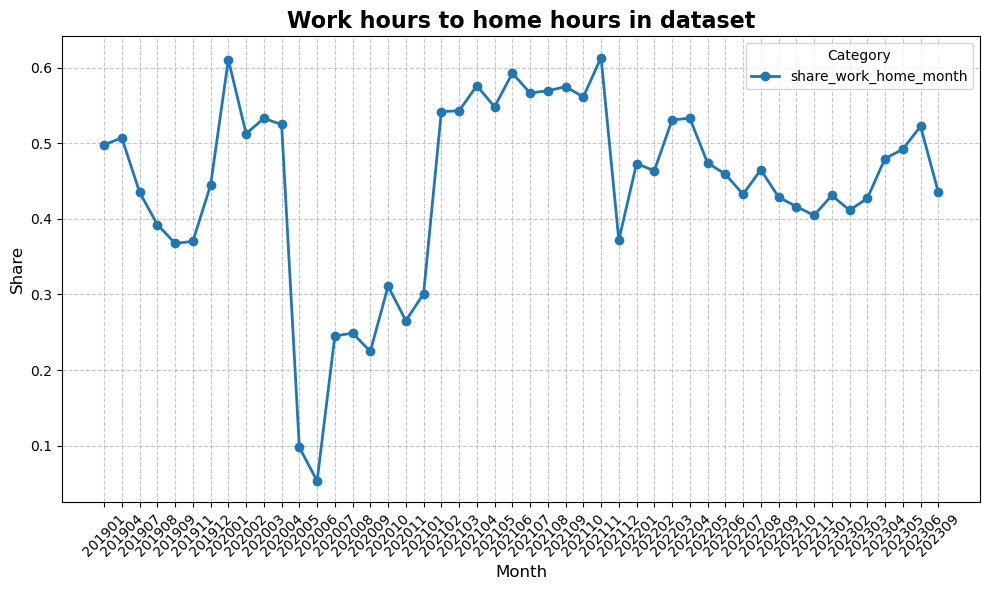

In [21]:
# Grouping and plotting
#work hours come from 001-home-location-monthly.py. they are between 11 am and 16 pm
ax = work_stat_area_all[(work_stat_area_all.month.isin(months_ok ))&(work_stat_area_all.count_users>=3)].groupby('month')["share_work_home_month"].mean().plot(
    figsize=(10, 6),  # Adjust the figure size
    marker='o',       # Add markers to the lines
    linestyle='-',    # Set line style
    linewidth=2       # Set line width
)

# Customize the plot
ax.set_title('Work hours to home hours in dataset', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Share', fontsize=12)
ax.legend(title='Category', fontsize=10)
ax.grid(visible=True, linestyle='--', alpha=0.7)  # Add a grid

# Make the x-axis labels more readable if 'month' is not numerical
months = sorted(months_ok )  # Extract unique months  # Spread ticks evenly
ax.set_xticks(range(len(months))) 
ax.set_xticklabels(months, rotation=45, fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

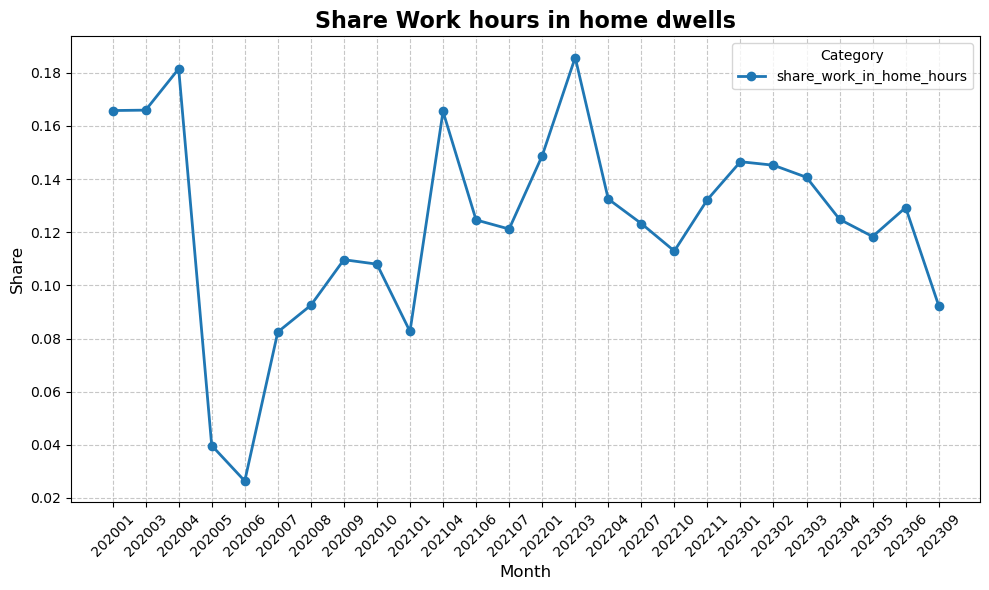

In [100]:
# this absolutely doesnt make sense. It looks opposite to reality. It happens because of low share of work hours

# Grouping and plotting
ax =work_stat_area_all[(work_stat_area_all.month.isin(months_ok ))&(work_stat_area_all.count_users>=5)].groupby('month')['share_work_in_home_hours'].mean().plot(
    figsize=(10, 6),  # Adjust the figure size
    marker='o',       # Add markers to the lines
    linestyle='-',    # Set line style
    linewidth=2       # Set line width
)

# Customize the plot
ax.set_title('Share Work hours in home dwells', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Share', fontsize=12)
ax.legend(title='Category', fontsize=10)
ax.grid(visible=True, linestyle='--', alpha=0.7)  # Add a grid

# Make the x-axis labels more readable if 'month' is not numerical
months = sorted(months_ok )  # Extract unique months  # Spread ticks evenly
ax.set_xticks(range(len(months))) 
ax.set_xticklabels(months, rotation=45, fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

What if we assume that every day person travel to work and calculate how many times it breaks?

How often do we not see him at work location?

# Lets explore by stat area what is happening

In [112]:
stat_area_num = 86000523

In [113]:
work_stat_area_all[(work_stat_area_all['YISHUV_STAT_2022']==stat_area_num)&(work_stat_area_all.month.isin(months_ok ))&(work_stat_area_all.count_users>=5)]

,YISHUV_STAT_2022,share_home_work_hours,share_work_in_home_hours,share_days_work_location,hour_work_all,hour_home_all,count_users,month,share_work_home_month,total_work_home_month
1224,86000523,0.200495,0.129110,0.374275,30.113636,46.500000,44,202001,0.647605,76.613636
998,86000523,0.502674,0.167540,0.457841,21.352941,47.882353,17,202002,0.445946,69.235294
1037,86000523,0.396422,0.305609,0.320027,25.000000,32.250000,8,202003,0.775194,57.250000
1079,86000523,0.316316,0.124268,0.451166,32.285714,76.857143,9,202005,0.420074,109.142857
1146,86000523,0.331502,0.009388,0.294772,2.379310,76.724138,13,202006,0.031011,79.103448
1176,86000523,0.282242,0.059420,0.294531,16.233333,72.633333,30,202007,0.223497,88.866667
1179,86000523,0.365966,0.102955,0.245572,18.538462,72.717949,39,202008,0.254937,91.256410
1205,86000523,0.403279,0.099222,0.302707,24.138462,110.492308,65,202009,0.218463,134.630769
1132,86000523,0.291085,0.084570,0.316295,22.600000,77.633333,30,202010,0.291112,100.233333
1193,86000523,0.305375,0.061670,0.476516,16.270833,65.250000,48,202011,0.249361,81.520833


The was a hypothesis that share of home loc at work hours is proportional work hours number. Not really according to correlation

In [114]:
work_stat_area_all[(work_stat_area_all.month.isin(months_ok ))&(work_stat_area_all.count_users>=5)][['share_home_work_hours','hour_work_all']].corr()

,share_home_work_hours,hour_work_all
share_home_work_hours,1.000000,0.227622
hour_work_all,0.227622,1.000000


# By user

In [156]:
dict_user_months =dict()

In [157]:
for monthly_file in sorted(months_files):

    MONTH = monthly_file.split("_")[-1][:-4]
    print(MONTH)

    work_df_part = pd.read_csv(
        os.path.join(
            utils.get_path("processed", "dwells", "work"),
            f"users_work_home_{MONTH}.csv",
        ),
        index_col=0,
    )
     # Update the dictionary
    for identifier in work_df_part['identifier']:
        if identifier not in dict_user_months:
            dict_user_months[identifier] = []  # Initialize list for new identifier
        if MONTH not in dict_user_months[identifier]:
            dict_user_months[identifier].append(MONTH)
    

202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202301
202302
202303
202304
202305
202306
202309


In [160]:
frequent_identifiers_dict = dict((k,v) for k,v in dict_user_months.items() if len(v)>=12)

In [161]:
len(frequent_identifiers_dict)

1752

## Save all frequent identifiers

In [165]:
df_freq_ident = pd.Series(frequent_identifiers_dict).reset_index()
df_freq_ident .columns = ['identifier','months_list']

In [166]:
df_freq_ident.to_csv(utils.get_path("processed","dwells","identifiers_12m_freq.csv"))

In [163]:
frequent_identifiers = list(frequent_identifiers_dict.keys())

In [131]:
list_freq_ident_df = []

Upload history

In [132]:
for monthly_file in sorted(months_files):

    MONTH = monthly_file.split("_")[-1][:-4]
    print(MONTH)

    work_df_part = pd.read_csv(
        os.path.join(
            utils.get_path("processed", "dwells", "work"),
            f"users_work_home_{MONTH}.csv",
        ),
        index_col=0,
    )
    freq_df = work_df_part[work_df_part.identifier.isin(frequent_identifiers)]
    freq_df['month']=MONTH
    list_freq_ident_df.append(freq_df)
    

202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202301
202302
202303
202304
202305
202306
202309


In [133]:
df_frequent_ident = pd.concat(list_freq_ident_df)

In [134]:
df_frequent_ident.shape

(50979, 31)

In [135]:
df_frequent_ident[df_frequent_ident.identifier=='4b68f03b-bda4-4bf6-8267-e241871a3d74'][['month','geohash_home','geohash_work']]

,month,geohash_home,geohash_work


Last month belongs to different person!

In [ ]:
df_frequent_ident_home = utils.make_gdf(df_frequent_ident, geometry="home_geometry")

In [ ]:
df_frequent_ident['geohash_work']

87       swnvcwp
414      swnty38
415      swntukm
440      swnwx3p
608      swny66f
          ...   
15727    swny5nw
16812    swny65q
21566    swnvc9m
21745    swny5ce
22172    swnwp25
Name: geohash_work, Length: 5777, dtype: object

In [ ]:
df_frequent_ident["work_geometry"] = df_frequent_ident['geohash_work'].apply(utils.geohash_to_polygon)

In [ ]:
df_frequent_ident_work = utils.make_gdf(df_frequent_ident, geometry="work_geometry")

In [ ]:
df_frequent_ident_home [df_frequent_ident_home.identifier=='4b68f03b-bda4-4bf6-8267-e241871a3d74'].set_geometry("home_geometry").explore()

In [ ]:
df_frequent_ident_work [df_frequent_ident_work.identifier=='4b68f03b-bda4-4bf6-8267-e241871a3d74'].set_geometry("work_geometry")[["work_geometry","month"]].explore()

In [ ]:
df_frequent_ident[df_frequent_ident.month>'2023'].head()

,identifier,date,work_date,share_days_work_location,commuting_distance,home_geometry,geohash_home,night_hours_count,nights_count,rank_night,...,share_work_in_home_hours,share_home_work_hours,share_work_in_home_days,share_home_work_days,share_home_hours_home,flag_frequent_user,geohash_work,weighted_commuting_distance,month,work_geometry
1005,0353b2c6-fe26-430f-b1bb-6c5cc2a7b3e6,31,19,0.612903,8832.786444,"POLYGON ((34.78271484375 31.988067626953125, 3...",swntzuj,85.0,26.0,1.0,...,0.211864,0.442478,0.875000,0.666667,0.512712,True,swnvcu8,5413.643304,202301,"POLYGON ((34.78546142578125 32.069091796875, 3..."
1040,0378b12f-7a5e-49da-9213-a9f187ce4b8e,29,5,0.172414,1719.070579,POLYGON ((34.770355224609375 32.02926635742187...,swnvbcg,63.0,19.0,1.0,...,0.269231,0.724138,0.800000,0.941176,0.551282,True,swnvbs1,296.391479,202301,"POLYGON ((34.78271484375 32.015533447265625, 3..."
1730,06819b3d-1bfd-4aa2-8342-0f27ab48dc44,31,20,0.645161,13746.377475,POLYGON ((34.759368896484375 32.01004028320312...,swnv8rv,38.0,15.0,3.0,...,0.351515,0.532110,0.629630,0.850000,0.381818,True,swny4yc,8868.630629,202301,POLYGON ((34.841766357421875 32.11441040039062...
1993,07da8be0-cbf3-4cec-b22e-ea9702d506be,31,22,0.709677,5188.444461,"POLYGON ((34.87335205078125 32.025146484375, 3...",swny2u8,61.0,21.0,1.0,...,0.187793,0.261438,0.666667,0.434783,0.431925,True,swny1xn,3682.121876,202301,"POLYGON ((34.8431396484375 32.06634521484375, ..."
3121,0c7b7e42-fddf-4193-8b46-9e8649a8fcf9,31,7,0.225806,4337.180957,"POLYGON ((34.903564453125 32.3602294921875, 34...",swpn86h,134.0,27.0,1.0,...,0.269022,0.733333,0.714286,0.909091,0.497283,True,swpnc08,979.363442,202301,"POLYGON ((34.93927001953125 32.3876953125, 34...."


In [54]:
user_min_max_months = df_frequent_ident.groupby('identifier').month.agg(['min','max'])

In [60]:
user_min_max_months[(user_min_max_months['min']<'2021')&(user_min_max_months['max']>'2023')].index[:20]

Index(['034f8330-44eb-40b8-a7a8-85162f943394',
       '0353b2c6-fe26-430f-b1bb-6c5cc2a7b3e6',
       '0378b12f-7a5e-49da-9213-a9f187ce4b8e',
       '06819b3d-1bfd-4aa2-8342-0f27ab48dc44',
       '07da8be0-cbf3-4cec-b22e-ea9702d506be',
       '0c7b7e42-fddf-4193-8b46-9e8649a8fcf9',
       '0e2a4c4f-1eb2-42e5-998c-a0d3b7ed7d1f',
       '0ebb5ebc-f573-49d2-ae4d-5de7b5aea5f9',
       '0efd806b-dfad-456e-8ab0-27eefa5f2cc3',
       '0fee1fb7-2c82-41ea-98c3-ebe611b64698',
       '1056ac87-3da4-4577-87c5-4d7c2c3dc4f1',
       '10bb32a1-94da-416d-8b6b-2311255cba27',
       '12af3116-fba8-4da3-80a2-743bd01e59f5',
       '12dc69db-536d-4669-a642-26215a38a02c',
       '14358b70-bd30-4606-9b57-e9c65cedb74b',
       '1447f592-1101-4e92-afcc-7ed4ea4787ad',
       '1769b038-7006-4b9a-948a-9518e332195c',
       '177ac873-54b9-4459-9070-32e1dbf48687',
       '19977e35-b279-45bb-9cbe-55fa5c4157e8',
       '19c4ed77-a2af-46de-8bff-b780a5f1089c'],
      dtype='object', name='identifier')

In [ ]:
df_frequent_ident_work [df_frequent_ident_work.identifier=="0353b2c6-fe26-430f-b1bb-6c5cc2a7b3e6"][['month','geohash_home','geohash_work']]

,month,geohash_home,geohash_work
542,202009,swntzuj,swnvcu8
272,202010,swntzuj,swnvcu8
259,202101,swntzuj,swnvcu8
180,202104,swntzuj,swnvcu8
180,202201,swntzuj,swnvcu8
265,202203,swntzuj,swnvcu8
182,202204,swntzuj,swnvcu8
489,202207,swntzuj,swnvcu8
655,202210,swntzuj,swnvcu8
812,202211,swntzuj,swnvcu8


This person works in Sorona and lives in Neve Yam

In [ ]:
df_frequent_ident_home [df_frequent_ident_home.identifier=="0353b2c6-fe26-430f-b1bb-6c5cc2a7b3e6"].explore()

In [ ]:
df_frequent_ident_home [df_frequent_ident_home.identifier=="0353b2c6-fe26-430f-b1bb-6c5cc2a7b3e6"][['month','date','work_date','share_days_work_location','nights_count','date_work_all','share_work_in_home_hours','share_home_work_hours','share_work_in_home_days','share_home_work_days','share_home_hours_home','weighted_commuting_distance']]

,month,date,work_date,share_days_work_location,nights_count,date_work_all,share_work_in_home_hours,share_home_work_hours,share_work_in_home_days,share_home_work_days,share_home_hours_home,weighted_commuting_distance
542,202009,25,9,0.360000,23.0,11.0,0.064935,0.322581,0.500000,0.727273,0.727273,3179.803120
272,202010,26,9,0.346154,20.0,13.0,0.043165,0.146341,0.210526,0.307692,0.899281,3057.503000
259,202101,23,9,0.391304,13.0,9.0,0.022727,0.083333,0.153846,0.222222,0.750000,3456.307739
180,202104,21,3,0.142857,7.0,7.0,0.155556,0.318182,1.200000,0.857143,0.400000,1261.826635
180,202201,16,4,0.250000,12.0,7.0,0.108434,0.300000,0.857143,0.857143,0.493976,2208.196611
265,202203,23,5,0.217391,6.0,11.0,0.153846,0.333333,1.000000,0.727273,0.307692,1920.170966
182,202204,20,6,0.300000,3.0,7.0,0.000000,0.000000,0.000000,0.000000,0.120000,2649.835933
489,202207,25,10,0.400000,16.0,11.0,0.021583,0.063830,0.142857,0.181818,0.582734,3533.114577
655,202210,30,11,0.366667,13.0,11.0,0.032787,0.111111,0.176471,0.272727,0.401639,3238.688363
812,202211,28,15,0.535714,19.0,15.0,0.046154,0.105263,0.285714,0.266667,0.630769,4731.849880


In [50]:
df_frequent_ident_home [df_frequent_ident_home.identifier=="0353b2c6-fe26-430f-b1bb-6c5cc2a7b3e6"][['date','work_date','share_days_work_location','nights_count','date_work_all','share_work_in_home_hours','share_home_work_hours','share_work_in_home_days','share_home_work_days','share_home_hours_home','weighted_commuting_distance']].corr()['share_home_work_hours']

date                           0.362784
work_date                      0.299899
share_days_work_location       0.030614
nights_count                   0.427460
date_work_all                  0.591554
share_work_in_home_hours       0.941782
share_home_work_hours          1.000000
share_work_in_home_days        0.886991
share_home_work_days           0.915547
share_home_hours_home         -0.173696
weighted_commuting_distance    0.030614
Name: share_home_work_hours, dtype: float64

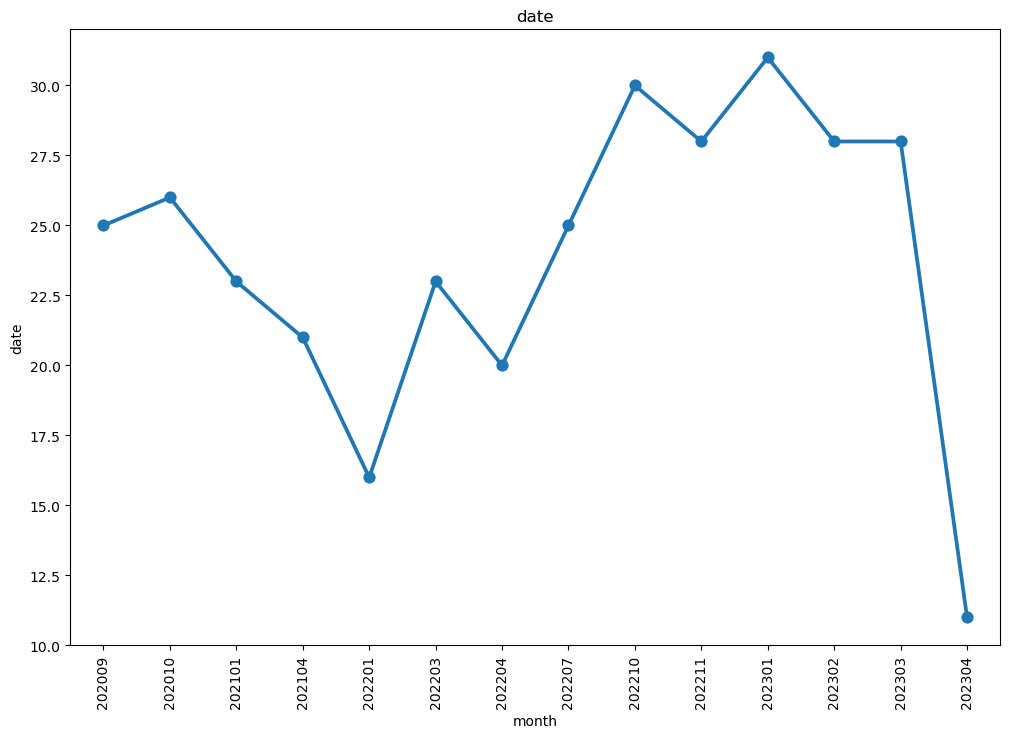

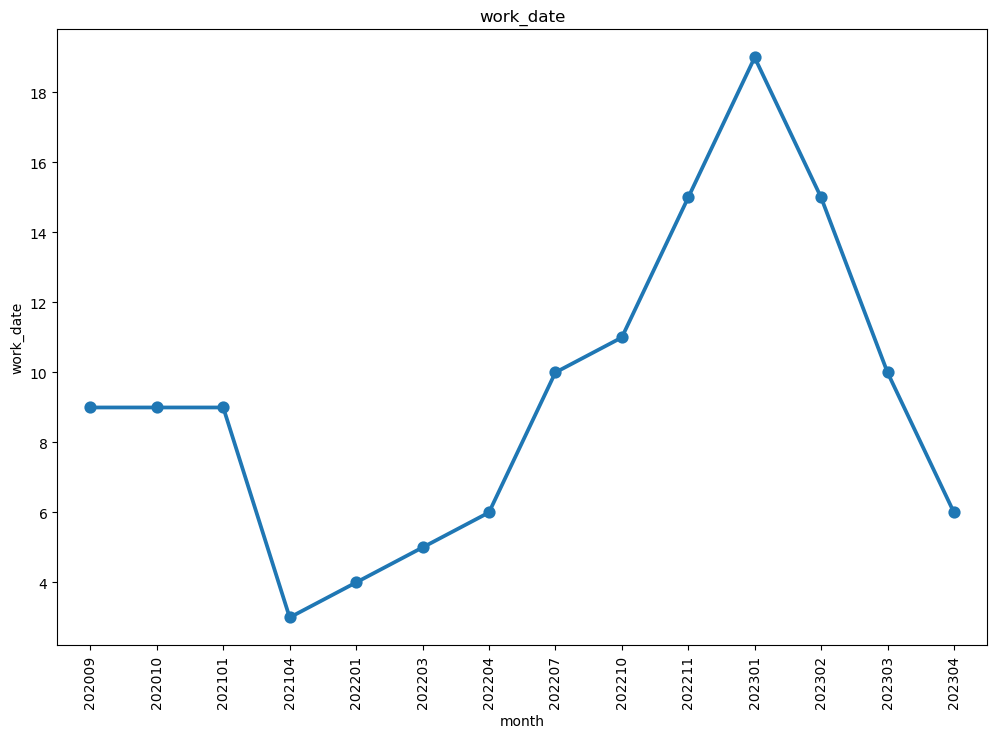

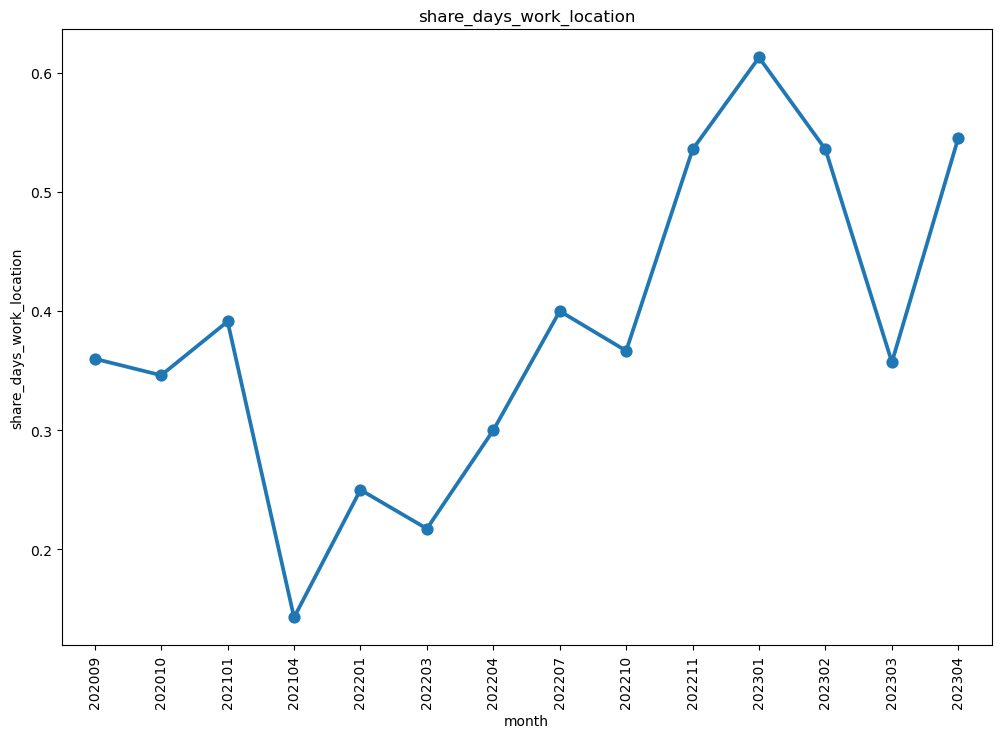

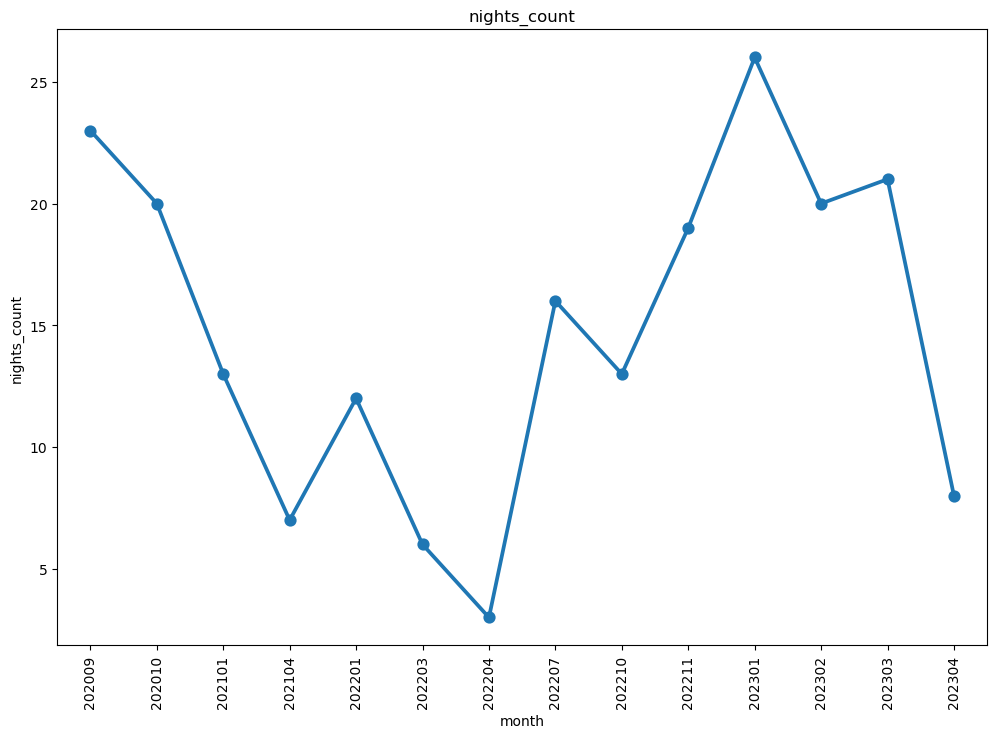

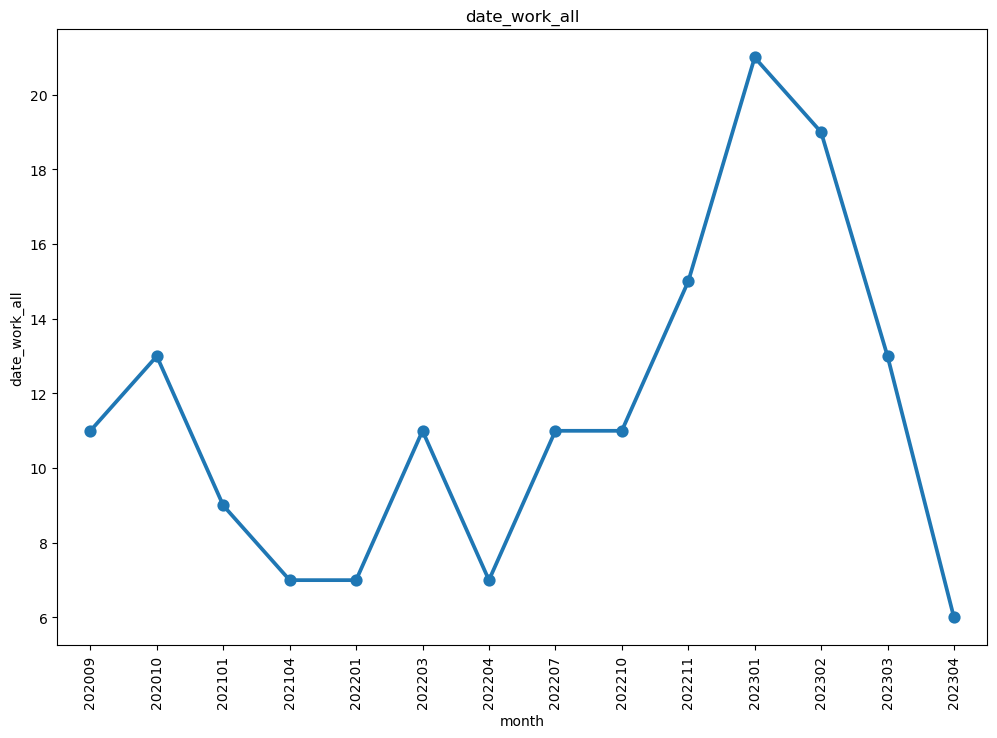

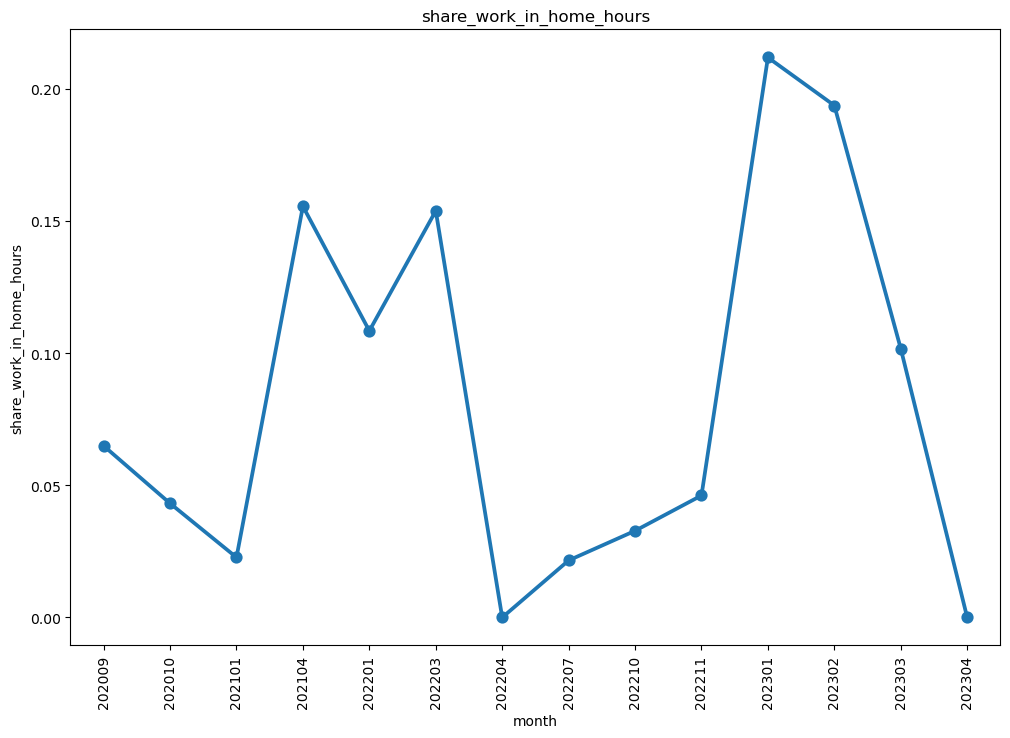

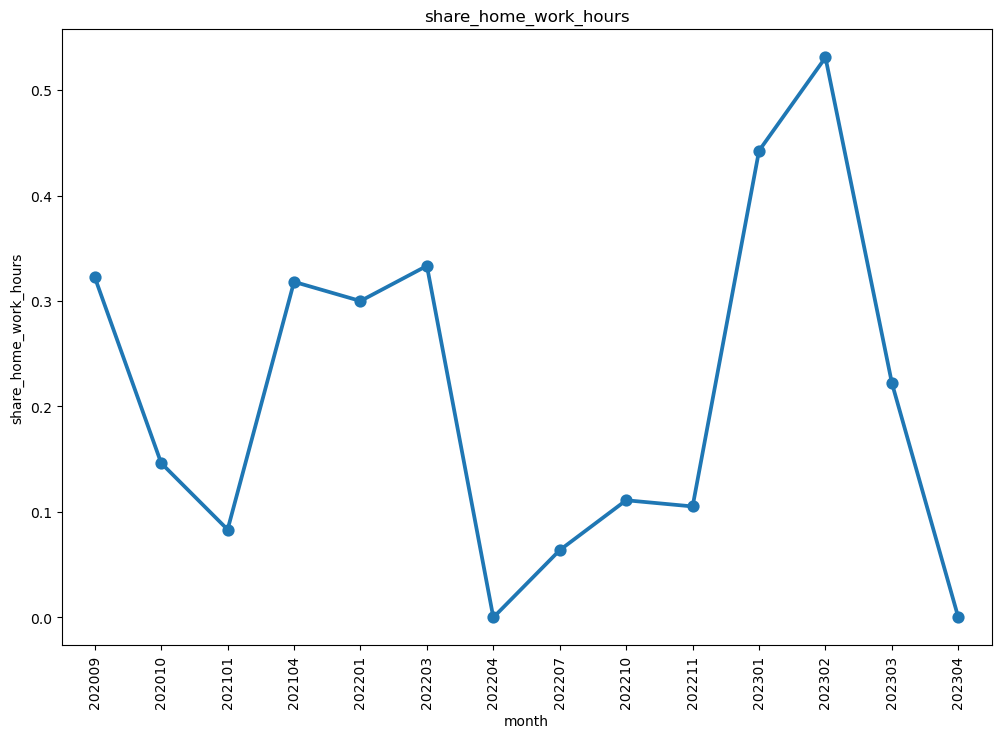

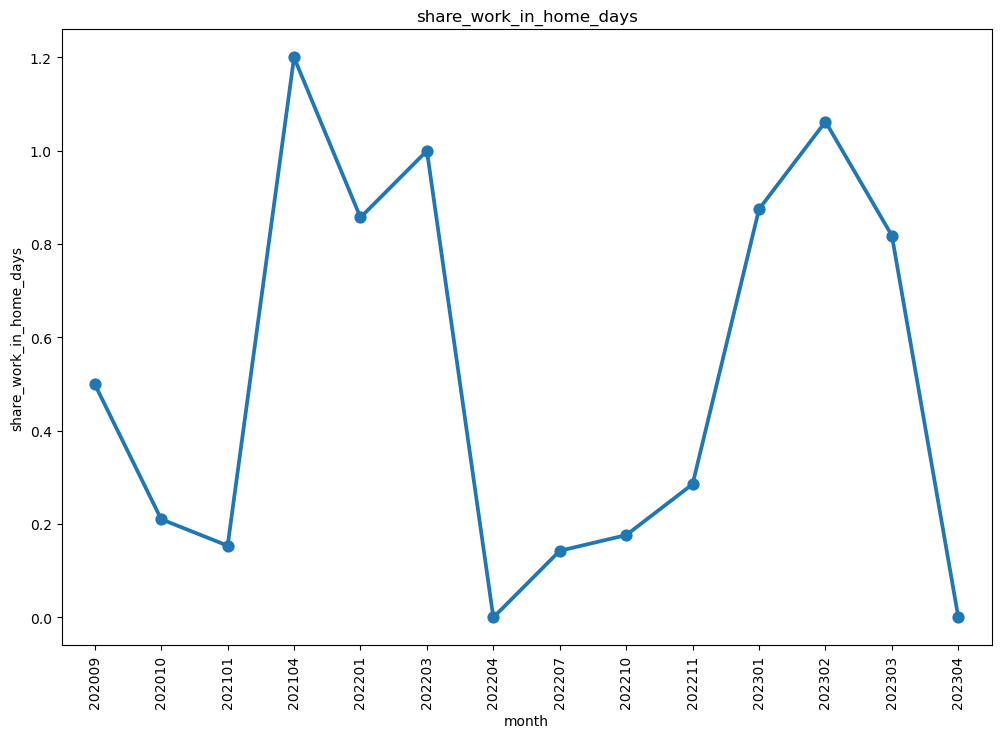

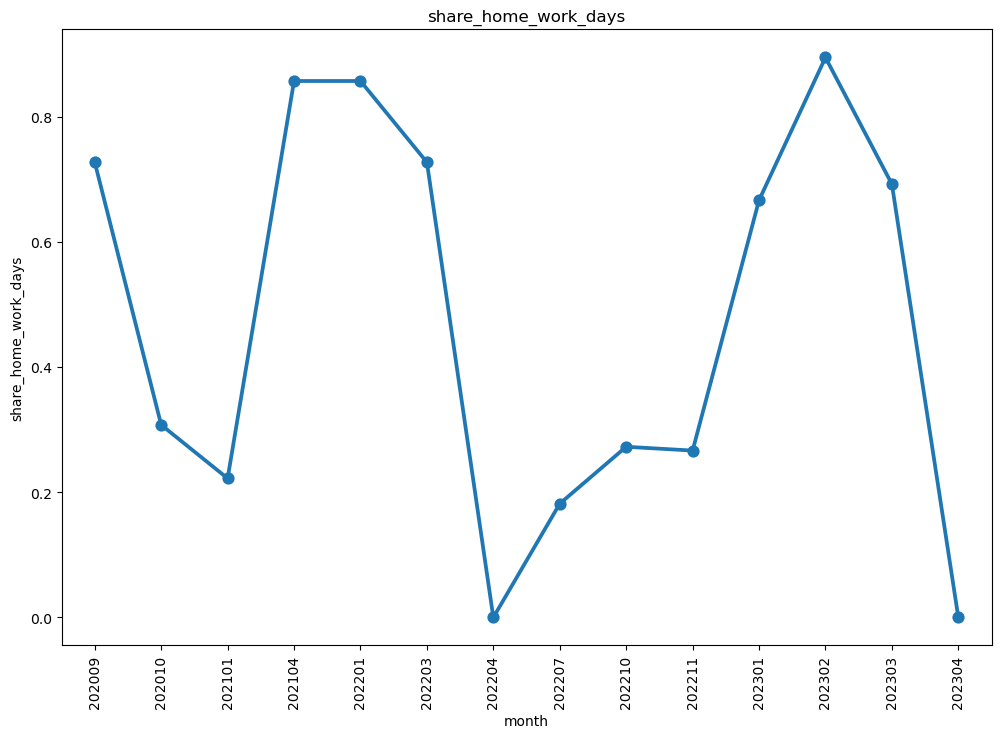

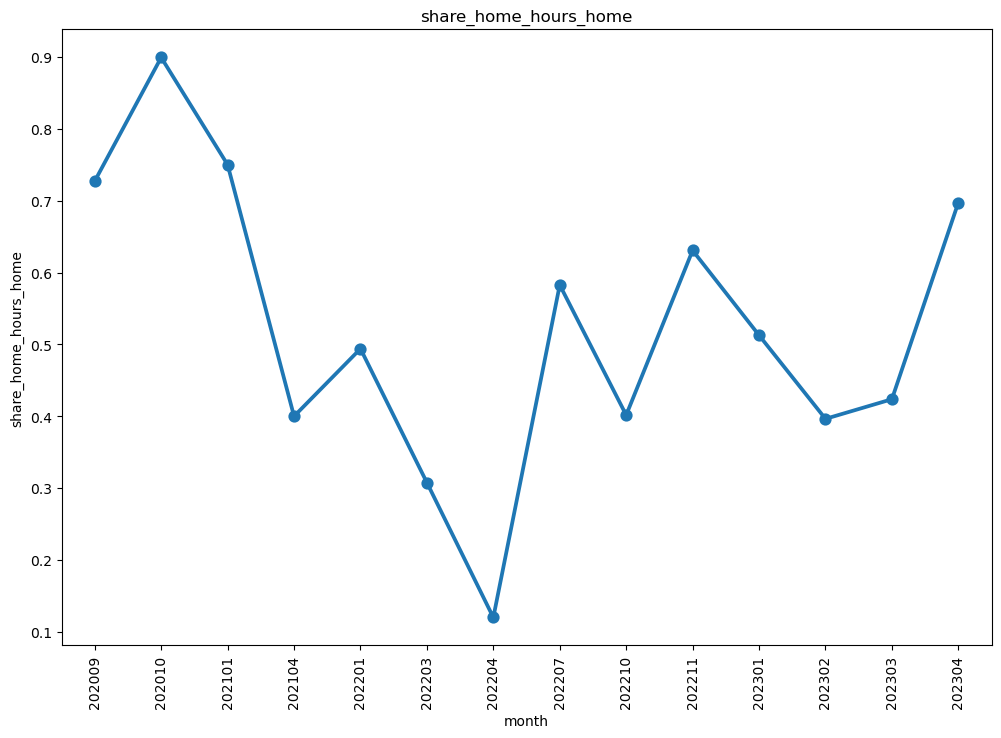

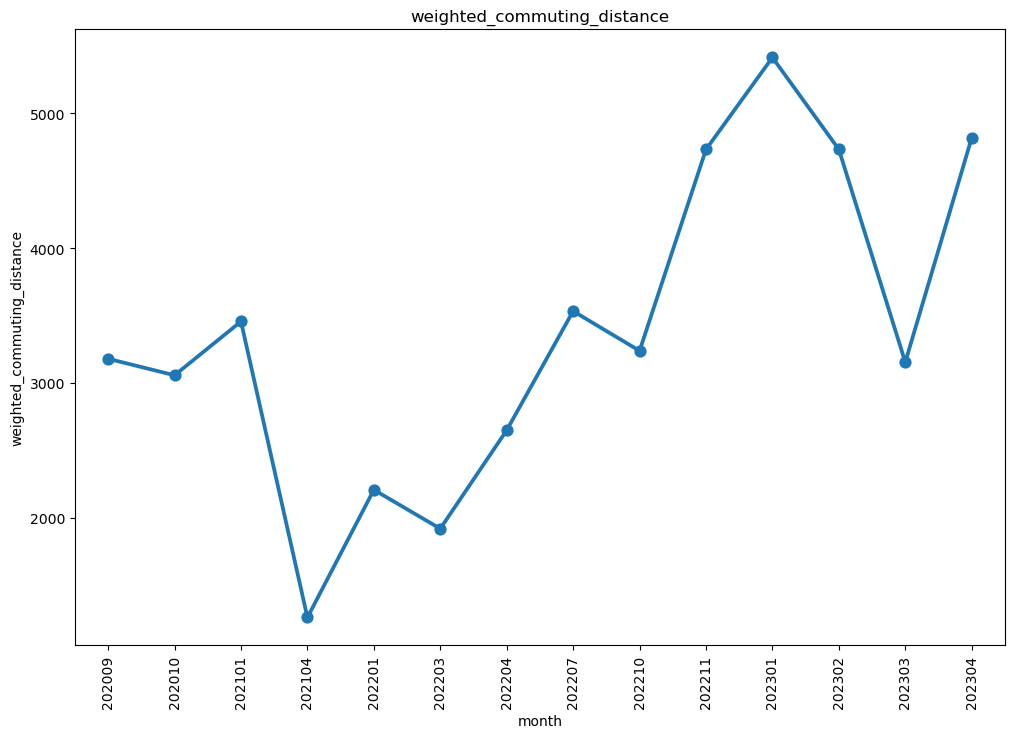

In [51]:
import seaborn as sn
for col in ['date','work_date','share_days_work_location','nights_count','date_work_all','share_work_in_home_hours','share_home_work_hours','share_work_in_home_days','share_home_work_days','share_home_hours_home','weighted_commuting_distance']:
    plt.figure(figsize=(12,8))
    sn.pointplot(data =df_frequent_ident_home [df_frequent_ident_home.identifier=="0353b2c6-fe26-430f-b1bb-6c5cc2a7b3e6"],
                x = 'month', y=col)
    plt.xticks(rotation='vertical');
    plt.title(col)
    plt.show()

In [ ]:
work_stat_area_all['month'] =pd.to_datetime(work_stat_area_all['month']+ '01', format='%Y%m%d')

In [ ]:
work_stat_area_all = stat_areas[['YISHUV_STAT_2022',"geometry"]].merge(work_stat_area_all, on='YISHUV_STAT_2022')

In [ ]:
work_stat_area_all["flag_frqnt_month"] = work_stat_area_all.groupby('YISHUV_STAT_2022').transform('size')>=16

In [ ]:
work_stat_area_all["flag_frqnt_month"].value_counts()

In [ ]:
work_stat_area_all.to_file(utils.get_path("processed","dwells","data_statistics/remote_work_stat_areas_dynamic.geojson"))